#### Problem Statment:

DDS is a startup company that is planning to start a shuttle service (pick-up and drop) at a discounted price. However, there are limited seats available and the company only wants to provide this service to the employees who are highly likely to buy the service for a long time.

You as a data scientist have to build to model to automate the task of identifying such employees using the data obtained from a survey conducted by the HR department.



Attribute Information:

* Age: Age of the employee

* Gender: Gender of employee

* Engineer: Does the employee have Engineering Degree. 1 indicates the employee has an engineering degree 0 indicates the employee doesn't

* MBA: Does the employee have MBA Degree. 1 indicates the employee has an MBA degree indicates the employee doesn't

* Work Exp: Work experience in years

* Salary: Annual Salary of employee (in thousand)

* Distance: Distance from office (in KM)

* License: Does the employee have a license

* Opt_Service: Employee opts for the service or not. 1 indicates employee opts for the service 0 indicates employee doesn't

### Kindly go through these guidelines before you attempt the quiz :


1. Use random_state=1 wherever this parameter can be used.
2. Kindly run all the code lines in the Jupyter Notebook.
3. Ensure there is a proper internet connection while taking up the quiz. Any breakup in the connection will automatically submit your quiz.
4. Only attempt the quiz when you are prepared and have enough time on your hands to finish it. Please ensure you attempt the quiz well before the due date. No extension will be provided for any quiz once the deadline is passed.
5. The quiz once opened, must be completed within the time frame provided. You CANNOT start the quiz, leave it unattended for an extended period of time and come back later to finish.
6. No re-attempts will be provided if the quiz gets submitted for any of the above-mentioned reasons.
7. If you face any other technical issues on Olympus, you should share the screenshot with your Program Manager so that the team can understand and resolve it on priority.

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("Cars-dataset.csv")

In [3]:
data.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0


In [4]:
data.shape

(418, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [6]:
data.isna().sum()

Age            0
Gender         0
Engineer       0
MBA            0
Work Exp       0
Salary         0
Distance       0
license        0
Opt_service    0
dtype: int64

In [7]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['Gender'], dtype='object')

In [8]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,418.0,27.334928,4.153272,18.0,25.000,27.0,29.000,43.0
Engineer,418.0,0.748804,0.434221,0.0,0.250,1.0,1.000,1.0
MBA,418.0,0.260766,0.439578,0.0,0.000,0.0,1.000,1.0
Work Exp,418.0,5.873206,4.816110,0.0,3.000,5.0,8.000,24.0
Salary,418.0,15.418421,9.660234,6.5,9.625,13.0,14.900,57.0
Distance,418.0,11.306220,3.722143,3.2,8.600,10.9,13.575,23.4
license,418.0,0.205742,0.404727,0.0,0.000,0.0,0.000,1.0
Opt_service,418.0,0.083732,0.277317,0.0,0.000,0.0,0.000,1.0


In [10]:
data.describe(include=['category']).T

,count,unique,top,freq
Gender,418,2,Male,297


In [11]:
cols_cat= data.select_dtypes(['category'])

In [12]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in Gender are :
Male      297
Female    121
Name: Gender, dtype: int64
**************************************************


In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

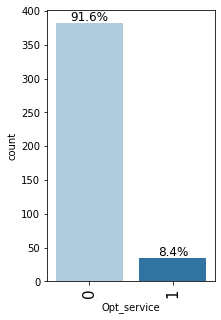

In [15]:
 labeled_barplot(data, "Opt_service", perc=True)

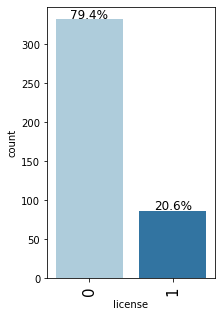

In [16]:
 labeled_barplot(data, "license", perc=True)

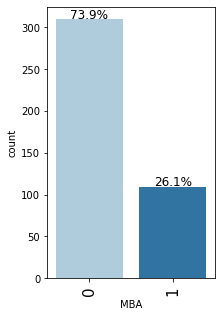

In [17]:
 labeled_barplot(data, "MBA", perc=True)

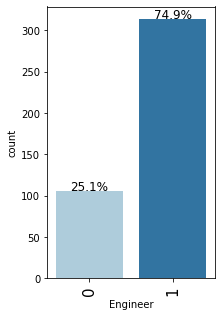

In [18]:
labeled_barplot(data, "Engineer", perc=True)

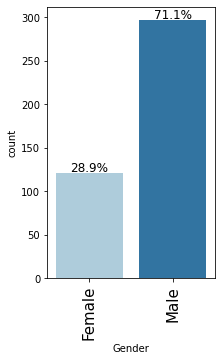

In [19]:
labeled_barplot(data, "Gender", perc=True)

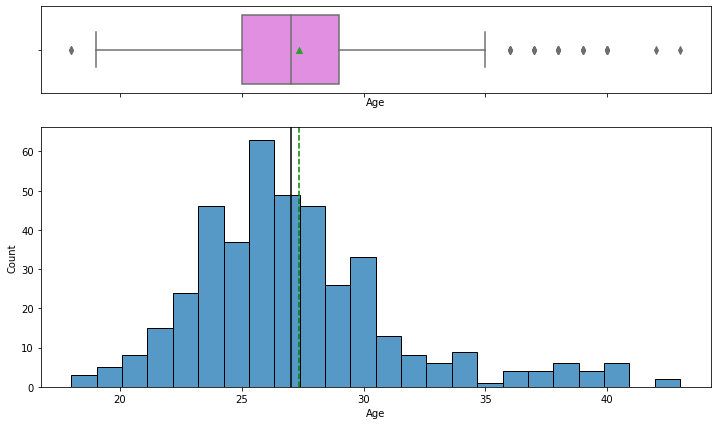

In [20]:
 histogram_boxplot(data,'Age')

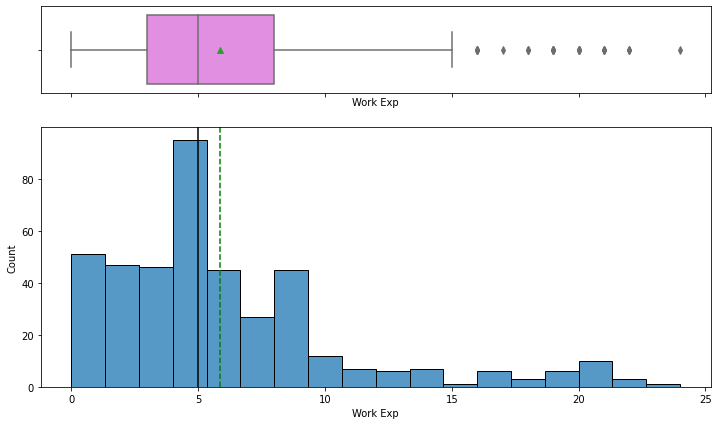

In [21]:
 histogram_boxplot(data,'Work Exp')

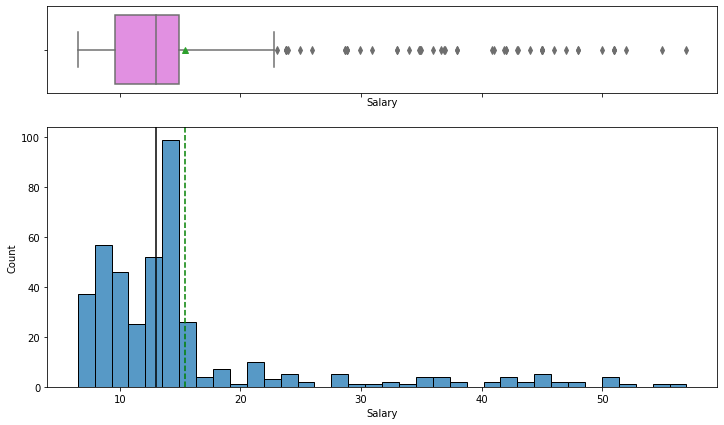

In [22]:
 histogram_boxplot(data,'Salary')

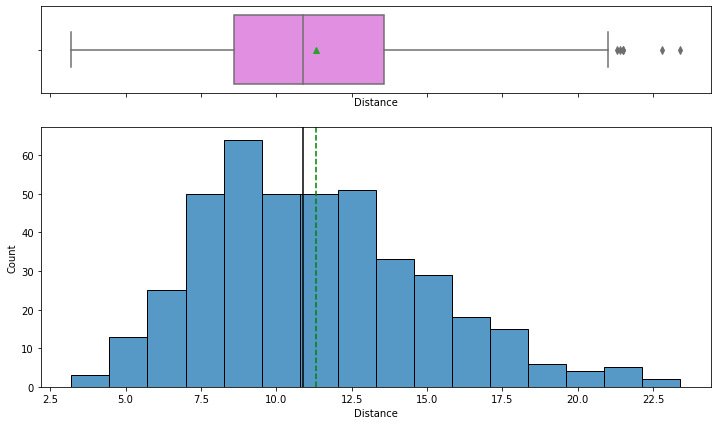

In [23]:
 histogram_boxplot(data,'Distance')

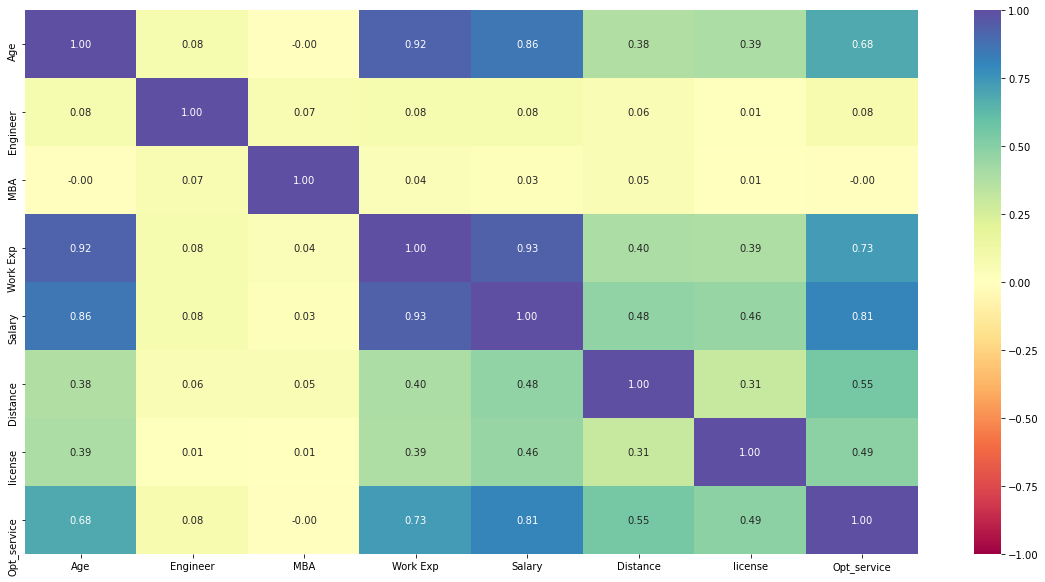

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

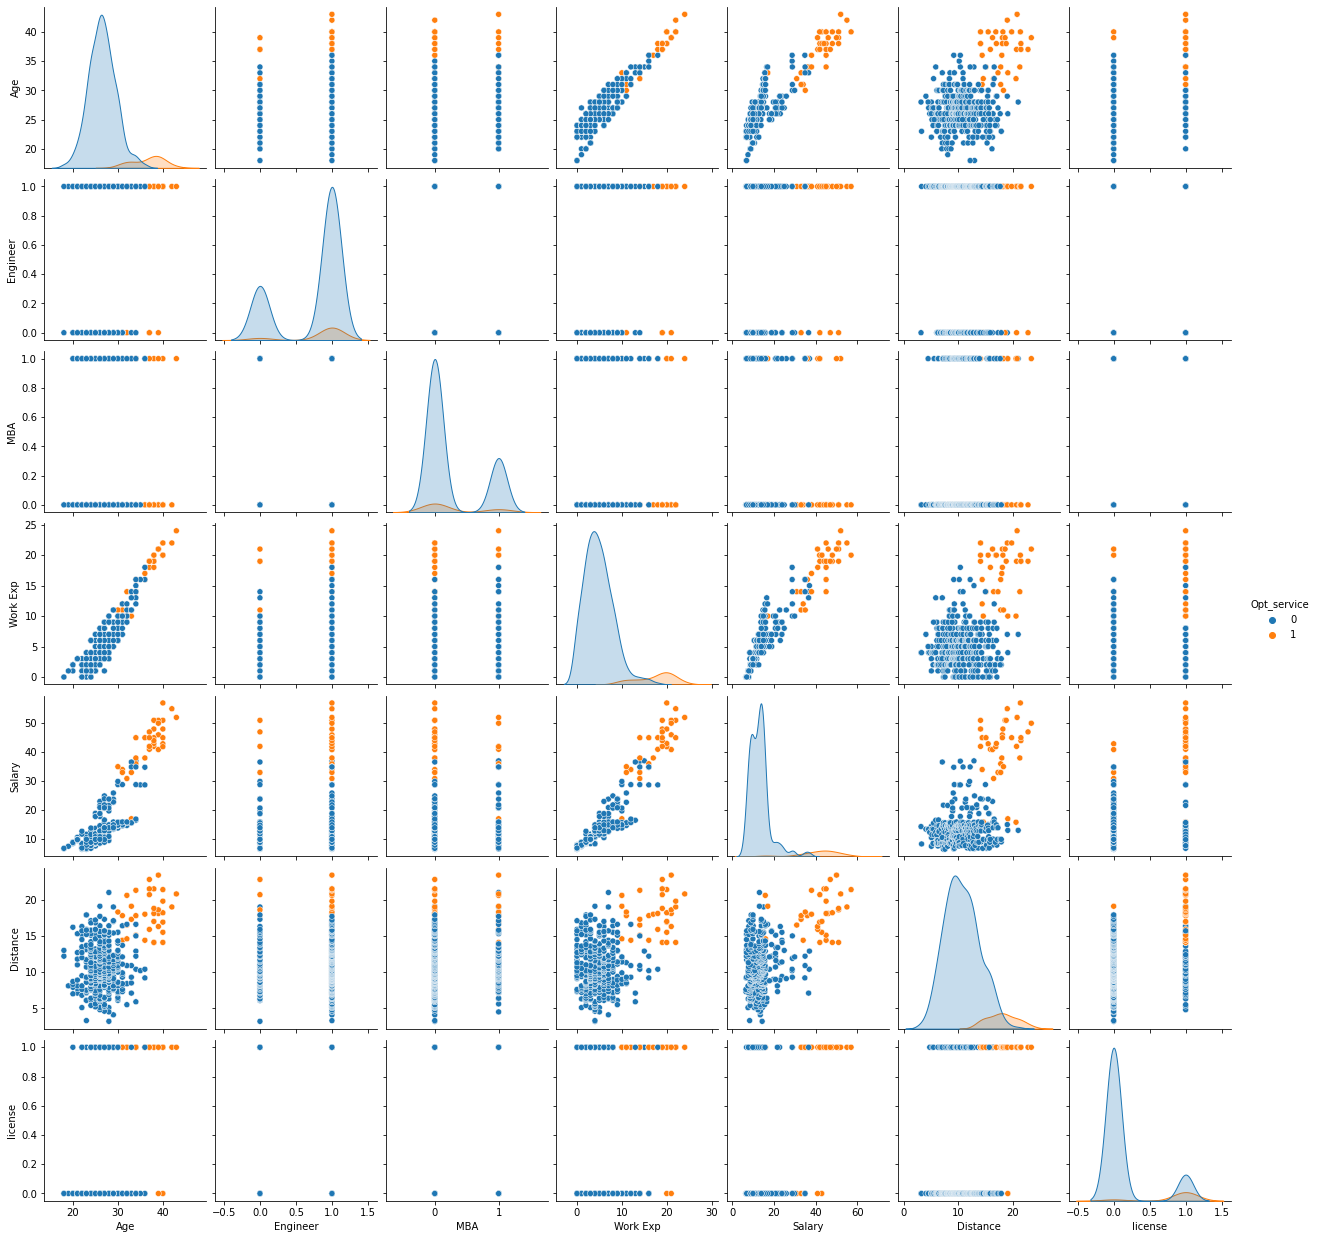

In [25]:
sns.pairplot(data,hue='Opt_service')
plt.show()

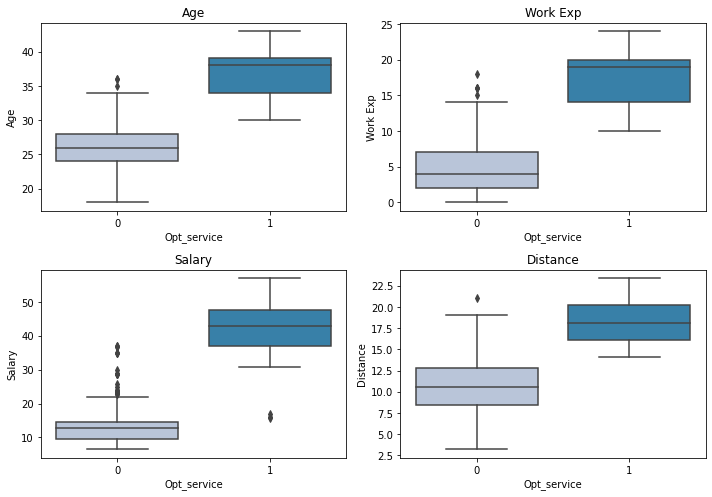

In [26]:
cols = data[['Age','Work Exp','Salary','Distance']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Opt_service"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

In [27]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Opt_service    0   1  All
Gender                   
All          383  35  418
Male         268  29  297
Female       115   6  121
------------------------------------------------------------------------------------------------------------------------


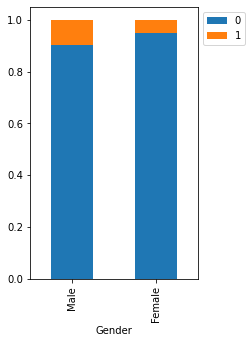

In [28]:
stacked_barplot(data, "Gender", "Opt_service")

Opt_service    0   1  All
Engineer                 
All          383  35  418
1            283  30  313
0            100   5  105
------------------------------------------------------------------------------------------------------------------------


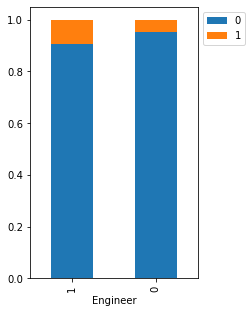

In [29]:
stacked_barplot(data, "Engineer", "Opt_service")

Opt_service    0   1  All
MBA                      
All          383  35  418
0            283  26  309
1            100   9  109
------------------------------------------------------------------------------------------------------------------------


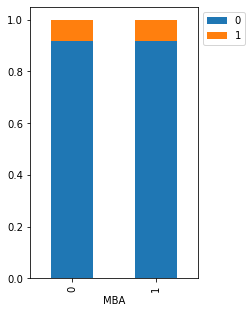

In [30]:
stacked_barplot(data, "MBA", "Opt_service")

Opt_service    0   1  All
license                  
All          383  35  418
1             56  30   86
0            327   5  332
------------------------------------------------------------------------------------------------------------------------


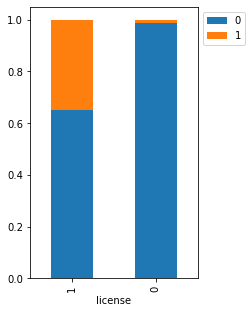

In [31]:
stacked_barplot(data, "license", "Opt_service")

In [192]:
X = data.drop(['Opt_service'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['Opt_service']

In [210]:
# Splitting data into training and test set:
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(292, 8) (126, 8)


In [215]:
y.value_counts(1)

0    0.916268
1    0.083732
Name: Opt_service, dtype: float64

In [216]:
y_train.value_counts(1)

0    0.917808
1    0.082192
Name: Opt_service, dtype: float64

In [217]:
y_test.value_counts(1)

0    0.912698
1    0.087302
Name: Opt_service, dtype: float64

In [218]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    roc = roc_auc_score(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "ROC-AUC": f1,
        },
        index=[0],
    )

    return df_perf

In [219]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [39]:
## Build Decision Tree Model

In [40]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.1,1:0.9},random_state=1)

In [41]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

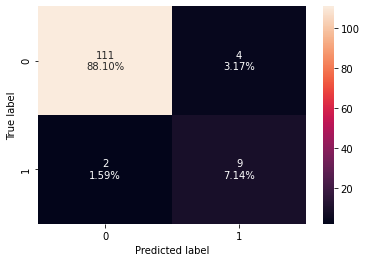

In [42]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [43]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [44]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.952381  0.818182   0.692308  0.75     0.75


In [45]:
### Bagging Classifier

In [224]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

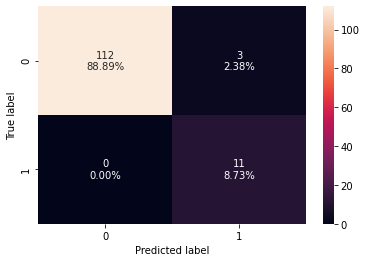

In [225]:
confusion_matrix_sklearn(bagging, X_test, y_test)

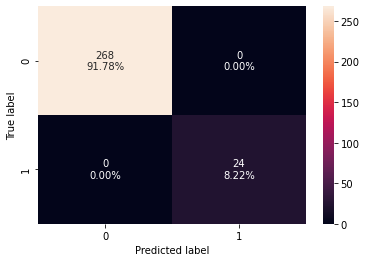

In [226]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [48]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.996575     1.0       0.96  0.979592  0.979592


In [49]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.936508  0.818182        0.6  0.692308  0.692308


In [78]:
#**Bagging Classifier with weighted decision tree**

In [79]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

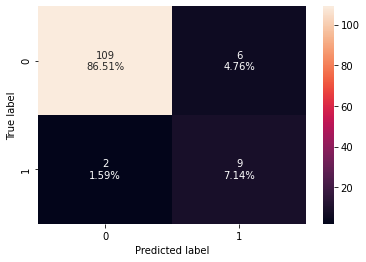

In [80]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [81]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Training performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.996575     1.0       0.96  0.979592  0.979592
Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.936508  0.818182        0.6  0.692308  0.692308


In [50]:
### Random Forest

In [227]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

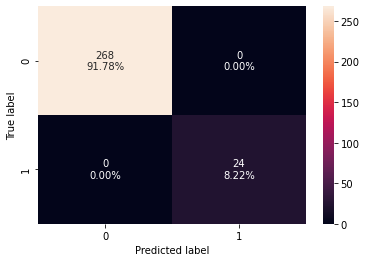

In [228]:
confusion_matrix_sklearn(rf,X_train,y_train)

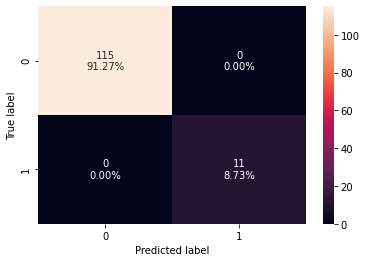

In [229]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [230]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [231]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [232]:
#bagging with logigisttic regression as base

In [234]:
bagging_log_reg = BaggingClassifier(base_estimator=LogisticRegression(random_state=1),random_state=1)
bagging_log_reg.fit(X_train,y_train)

bagging_log_reg_train_perf=model_performance_classification_sklearn(bagging_log_reg, X_train,y_train)
print("Training performance \n",bagging_log_reg_train_perf)

bagging_log_reg_test_perf=model_performance_classification_sklearn(bagging_log_reg, X_test,y_test)
print("Testing performance \n",bagging_log_reg_test_perf)


Training performance 
    Accuracy    Recall  Precision       F1  ROC-AUC
0  0.989726  0.916667   0.956522  0.93617  0.93617
Testing performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.992063     1.0   0.916667  0.956522  0.956522


In [137]:
###Random forest with class weights**

In [56]:
rf_wt = RandomForestClassifier(class_weight={0:0.1,1:0.9}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, random_state=1)

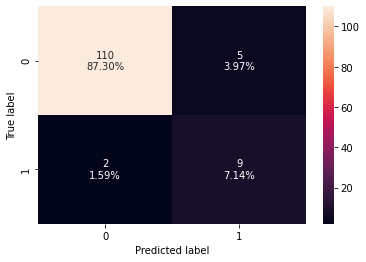

In [57]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [58]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [59]:
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


In [60]:
### Tuning Models

In [61]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.1,1:0.9},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

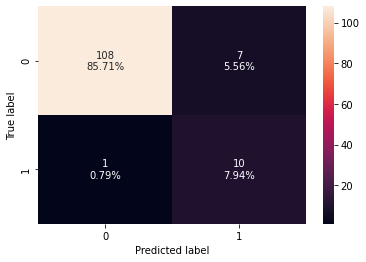

In [62]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [63]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.965753     1.0   0.705882  0.827586  0.827586


In [64]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.936508  0.909091   0.588235  0.714286  0.714286


**Tuning Bagging Classifier**

In [ ]:
"""
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.1,1:0.9},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)
"""

In [256]:
# grid search for bagging classifier

for x in np.arange(1,6,1):
    
    print(f"\n\n\nProcessing X values {x}")

    bagging_depth = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=x,random_state=1),random_state=1)
    bagging_depth.fit(X_train,y_train)




    bagging_estimator_model_train_perf_1=model_performance_classification_sklearn(bagging_depth, X_train,y_train)
    print("Training performance \n",bagging_estimator_model_train_perf_1)







Processing X values 1
Training performance 
    Accuracy  Recall  Precision    F1  ROC-AUC
0  0.972603   0.875   0.807692  0.84     0.84



Processing X values 2
Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.996575  0.958333        1.0  0.978723  0.978723



Processing X values 3
Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.996575  0.958333        1.0  0.978723  0.978723



Processing X values 4
Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.996575  0.958333        1.0  0.978723  0.978723



Processing X values 5
Training performance 
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


In [246]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  random_state=1)

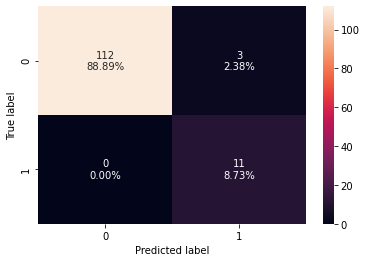

In [244]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [68]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.996575     1.0       0.96  0.979592  0.979592


In [69]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


**Tuning Random Forest**

In [70]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [20,50,100],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.7, min_samples_leaf=3,
                       n_estimators=20, random_state=1)

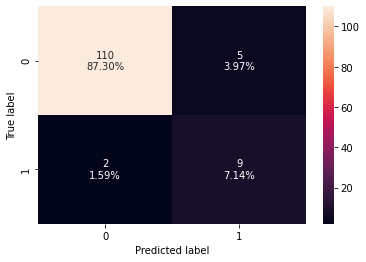

In [71]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [72]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.993151  0.958333   0.958333  0.958333  0.958333


In [73]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,bagging_model_train_perf.T, bagging_wt_model_train_perf.T,rf_model_train_perf.T,
    rf_wt_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_estimator_model_train_perf.T,
     rf_estimator_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1,ROC-AUC
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Bagging Classifier,0.996575,1.000000,0.960000,0.979592,0.979592
Weighted Bagging Classifier,0.996575,1.000000,0.960000,0.979592,0.979592
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Weighted Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree Estimator,0.965753,1.000000,0.705882,0.827586,0.827586
Bagging Estimator,0.996575,1.000000,0.960000,0.979592,0.979592
Random Forest Estimator,0.993151,0.958333,0.958333,0.958333,0.958333


In [84]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,bagging_model_test_perf.T, bagging_wt_model_test_perf.T,rf_model_test_perf.T,
    rf_wt_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_estimator_model_test_perf.T,
     rf_estimator_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier",
    "Decision Tree Estimator",
    "Bagging Estimator",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1,ROC-AUC
Decision Tree,0.952381,0.818182,0.692308,0.750000,0.750000
Bagging Classifier,0.936508,0.818182,0.600000,0.692308,0.692308
Weighted Bagging Classifier,0.936508,0.818182,0.600000,0.692308,0.692308
Random Forest Classifier,0.944444,0.818182,0.642857,0.720000,0.720000
Weighted Random Forest Classifier,0.944444,0.818182,0.642857,0.720000,0.720000
Decision Tree Estimator,0.936508,0.909091,0.588235,0.714286,0.714286
Bagging Estimator,0.944444,0.818182,0.642857,0.720000,0.720000
Random Forest Estimator,0.944444,0.818182,0.642857,0.720000,0.720000


### Feature importance of Random Forest

In [85]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(rf.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                  Imp
Salary       0.440304
Work Exp     0.222273
Age          0.176635
Distance     0.125198
license      0.019815
Engineer     0.008375
MBA          0.004641
Gender_Male  0.002759


In [86]:
feature_names = X_train.columns

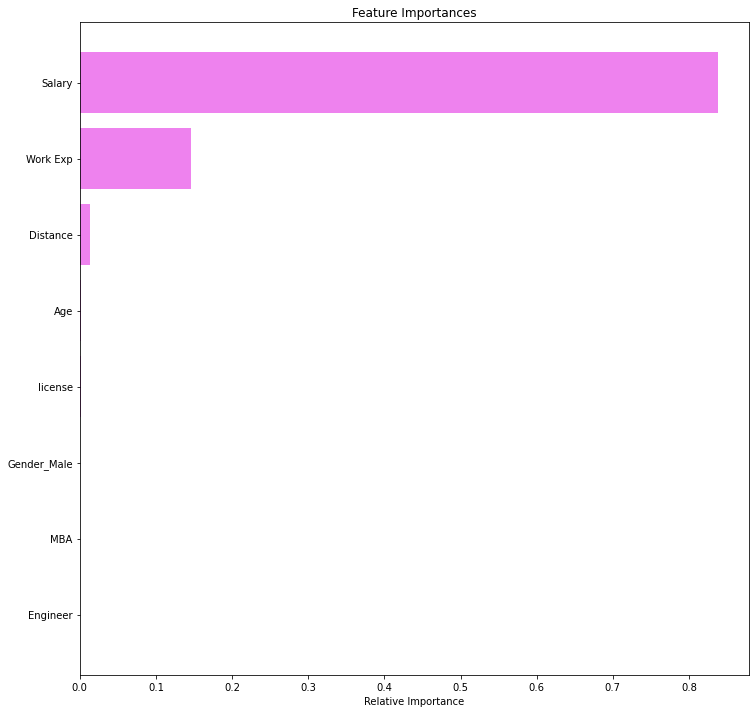

In [87]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Boosting

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision   F1  ROC-AUC
0  0.960317  0.909091   0.714286  0.8      0.8


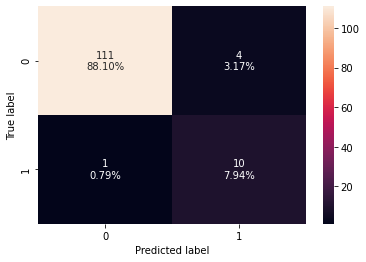

In [89]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

### Hyperparameter Tuning

In [91]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.1,1:0.9},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=2,
                       max_leaf_nodes=3, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision   F1  ROC-AUC
0  0.960317  0.909091   0.714286  0.8      0.8


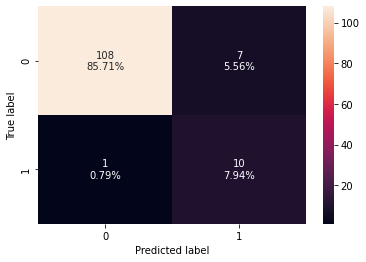

In [92]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


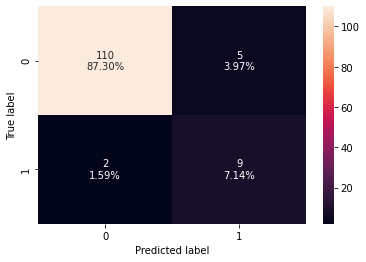

In [93]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

### Hyperparameter Tuning

In [94]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=5,
                       max_features='sqrt', min_samples_split=17,
                       n_estimators=30, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.993151  0.958333   0.958333  0.958333  0.958333
Testing performance:
    Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


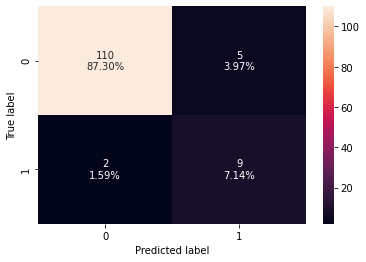

In [95]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

## Bagging Classifier

   Accuracy  Recall  Precision        F1   ROC-AUC
0  0.996575     1.0       0.96  0.979592  0.979592
   Accuracy    Recall  Precision        F1   ROC-AUC
0  0.936508  0.818182        0.6  0.692308  0.692308


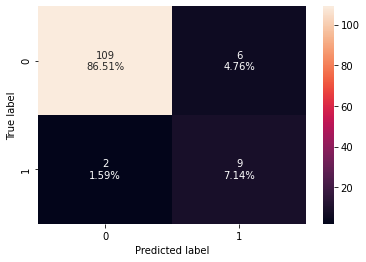

In [96]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

   Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
   Accuracy    Recall  Precision    F1  ROC-AUC
0  0.944444  0.818182   0.642857  0.72     0.72


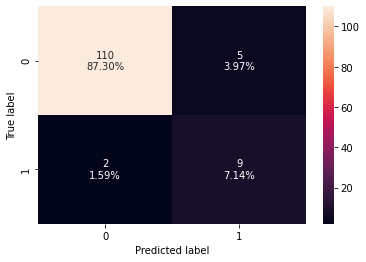

In [99]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

## AdaBoost Classifier

   Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
   Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


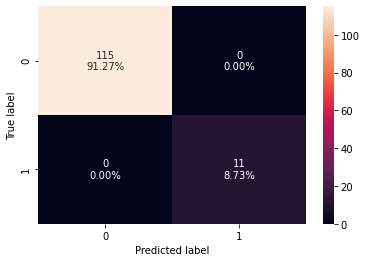

In [257]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

### Hyperparameter Tuning

In [103]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1.1,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.6, n_estimators=10, random_state=1)

   Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
   Accuracy    Recall  Precision   F1  ROC-AUC
0  0.984127  0.818182        1.0  0.9      0.9


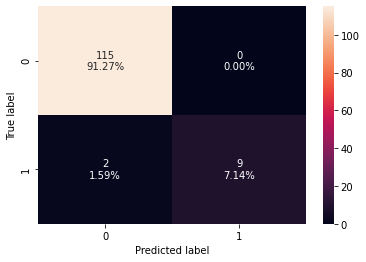

In [106]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

## Gradient Boosting Classifier

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.992063     1.0   0.916667  0.956522  0.956522


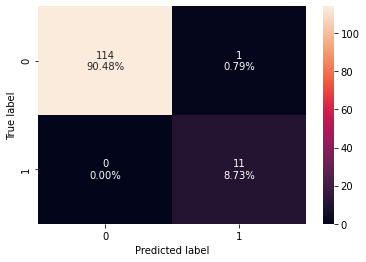

In [260]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

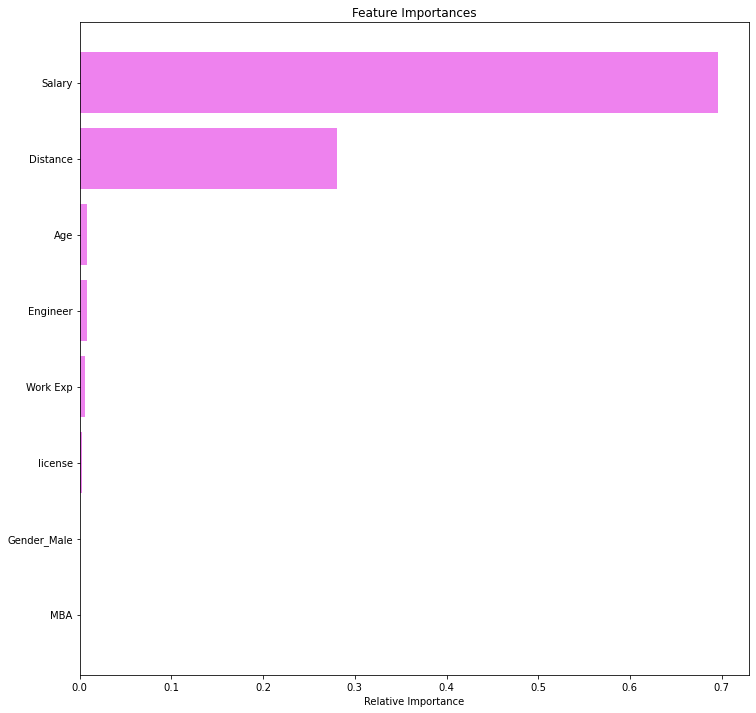

In [261]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [266]:
#Fitting the model
gb_classifier_1 = GradientBoostingClassifier( n_estimators=50, learning_rate=0.01,random_state=1)
gb_classifier_1.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier_1,X_train,y_train)
print("Training performance 1:\n",gb_classifier_model_train_perf)

gb_classifier_2 = GradientBoostingClassifier( n_estimators=100, learning_rate=0.01,random_state=1)
gb_classifier_2.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier_2,X_train,y_train)
print("Training performance 2 :\n",gb_classifier_model_train_perf)

gb_classifier_3 = GradientBoostingClassifier( n_estimators=400, learning_rate=0.01,random_state=1)
gb_classifier_3.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier_3,X_train,y_train)
print("Training performance 3 :\n",gb_classifier_model_train_perf)


Training performance 1:
    Accuracy  Recall  Precision   F1  ROC-AUC
0  0.917808     0.0        0.0  0.0      0.0
Training performance 2 :
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.996575  0.958333        1.0  0.978723  0.978723
Training performance 3 :
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


### Hyperparameter Tuning

In [108]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.97619  0.727273        1.0  0.842105  0.842105


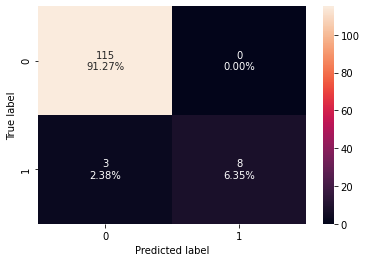

In [110]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

## XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0


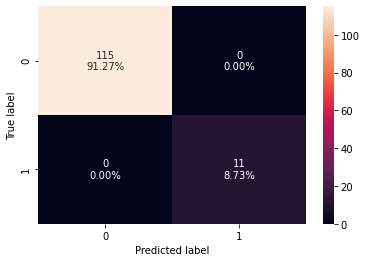

In [259]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

### Hyperparameter Tuning

In [111]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0   0.97619  0.727273        1.0  0.842105  0.842105


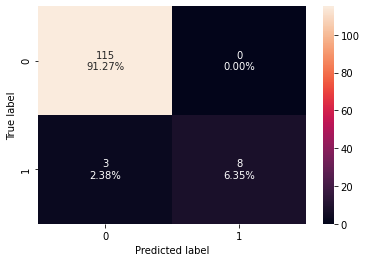

In [112]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

## Stacking Classifier

In [113]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.18,
                                                                     1: 0.82},
                                                       max_depth=5,
                                                       max_features='sqrt',
                                                       min_samples_split=17,
                                                       n_estimators=30,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                    

Training performance:
    Accuracy  Recall  Precision   F1  ROC-AUC
0       1.0     1.0        1.0  1.0      1.0
Testing performance:
    Accuracy    Recall  Precision        F1   ROC-AUC
0  0.960317  0.727273        0.8  0.761905  0.761905


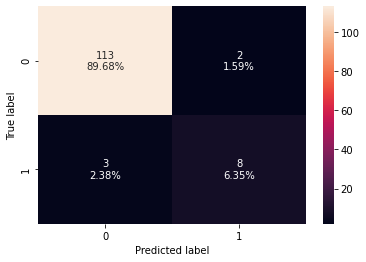

In [114]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

In [268]:

#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

 #Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

estimators = [ ('Decision Tree',d_tree),('Bagging',bagging_classifier)]

final_estimator = rf_estimator

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
#stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
#print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
#confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

Training performance:
    Accuracy  Recall  Precision        F1   ROC-AUC
0  0.969178     1.0   0.727273  0.842105  0.842105


In [272]:
#Fitting the model
xgb_classifier1 = XGBClassifier(eval_metric='logloss',random_state=1)
xgb_classifier1.fit(X_train,y_train)


#Fitting the model
gb_classifier1 = GradientBoostingClassifier(random_state=1)
gb_classifier1.fit(X_train,y_train)

#Fitting the model
ab_classifier1 = AdaBoostClassifier(random_state=1)
ab_classifier1.fit(X_train,y_train)


estimators = [('Ada',ab_classifier1), ('GB',gb_classifier1)]

final_estimator = xgb_classifier1

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)


stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)


Testing performance:
    Accuracy  Recall  Precision    F1  ROC-AUC
0   0.97619     1.0   0.785714  0.88     0.88


In [116]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,Accuracy,Recall,Precision,F1,ROC-AUC
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
Decision Tree Estimator,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest Estimator,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest Tuned,0.993151,0.958333,0.958333,0.958333,0.958333
Bagging Classifier,0.996575,1.000000,0.960000,0.979592,0.979592
Bagging Estimator Tuned,1.000000,1.000000,1.000000,1.000000,1.000000
Adaboost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Adabosst Classifier Tuned,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boost Classifier Tuned,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df.T

Testing performance comparison:


,Accuracy,Recall,Precision,F1,ROC-AUC
Decision Tree,0.960317,0.909091,0.714286,0.800000,0.800000
Decision Tree Estimator,0.960317,0.909091,0.714286,0.800000,0.800000
Random Forest Estimator,0.944444,0.818182,0.642857,0.720000,0.720000
Random Forest Tuned,0.944444,0.818182,0.642857,0.720000,0.720000
Bagging Classifier,0.936508,0.818182,0.600000,0.692308,0.692308
Bagging Estimator Tuned,0.944444,0.818182,0.642857,0.720000,0.720000
Adaboost Classifier,0.968254,0.727273,0.888889,0.800000,0.800000
Adabosst Classifier Tuned,0.984127,0.818182,1.000000,0.900000,0.900000
Gradient Boost Classifier,0.960317,0.909091,0.714286,0.800000,0.800000
Gradient Boost Classifier Tuned,0.976190,0.727273,1.000000,0.842105,0.842105


### Feature importance of Tuned Random Forest

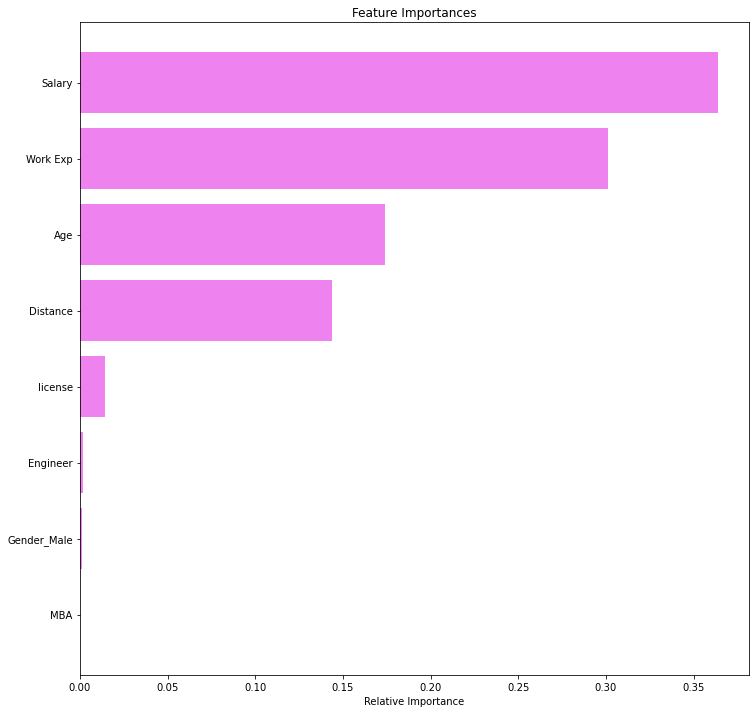

In [118]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()